# <center>Speech Emotion Recognition Datasets test<center>

In [1]:
#pip install librosa seaborn

In [2]:
# Import libraries 
import librosa
import matplotlib.pyplot as plt
#import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os
import sys
import warnings


# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [3]:
# Paths for data
SAVEE = "Datasets/surrey-audiovisual-expressed-emotion-savee/ALL/"
RAV = "Datasets/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
TESS = "Datasets/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
CREMA = "Datasets/cremad/AudioWAV/"
ANAD = "Datasets/Arabic Natural Audio Dataset/Speech/"
KSUEmotions = "Datasets/ksu_emotions/data/SPEECH/"

#  <center> About Surrey Audio-Visual Expressed Emotion (SAVEE) Dataset <center>
The SAVEE database was recorded from four native English male speakers (identified as DC, JE, JK, KL), postgraduate students and researchers at the University of Surrey aged from 27 to 31 years. Emotion has been described psychologically in discrete categories: anger, disgust, fear, happiness, sadness and surprise. A neutral category is also added to provide recordings of 7 emotion categories.

The text material consisted of 15 TIMIT sentences per emotion: 3 common, 2 emotion-specific and 10 generic sentences that were different for each emotion and phonetically-balanced. The 3 common and 2 × 6 = 12 emotion-specific sentences were recorded as neutral to give 30 neutral sentences. This resulted in a total of 120 utterances per speaker, for example:

Common: She had your dark suit in greasy wash water all year. <br> 
Anger: Who authorized the unlimited expense account? <br>
Disgust: Please take this dirty table cloth to the cleaners for me. <br> 
Fear: Call an ambulance for medical assistance. <br>
Happiness: Those musicians harmonize marvelously. <br>
Sadness: The prospect of cutting back spending is an unpleasant one for any governor. <br>
Surprise: The carpet cleaners shampooed our oriental rug. <br>
Neutral: The best way to learn is to solve extra problems.<br>
#### Academic citation 
@inproceedings{Vlasenko_combiningframe,
author = {Vlasenko, Bogdan and Schuller, Bjorn and Wendemuth, Andreas and Rigoll, Gerhard},
year = {2007},
month = {01},
pages = {2249-2252},
title = {Combining frame and turn-level information for robust recognition of emotions within speech},
journal = {Proceedings of Interspeech}
}
#### Acquired from
https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee 

In [4]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)
# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i.startswith('.'):
        continue
        
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('error') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
#SAVEE_df.labels.value_counts()

# <center> Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS)<center>

#### Files

This portion of the RAVDESS contains 1440 files: 60 trials per actor x 24 actors = 1440. The RAVDESS contains 24 professional actors (12 female, 12 male), vocalizing two lexically-matched statements in a neutral North American accent. Speech emotions includes calm, happy, sad, angry, fearful, surprise, and disgust expressions. Each expression is produced at two levels of emotional intensity (normal, strong), with an additional neutral expression.

#### File naming convention

Each of the 1440 files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 03-01-06-01-02-01-12.wav). These identifiers define the stimulus characteristics:

#### Filename identifiers

Modality (01 = full-AV, 02 = video-only, 03 = audio-only).<br>
Vocal channel (01 = speech, 02 = song).<br>
Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).<br>
Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.<br>
Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").<br>
Repetition (01 = 1st repetition, 02 = 2nd repetition).<br>
Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).<br>
Filename example: 03-01-06-01-02-01-12.wav<br>
Audio-only (03)<br>
Speech (01)<br>
Fearful (06)<br>
Normal intensity (01)<br>
Statement "dogs" (02)<br>
1st Repetition (01)<br>
12th Actor (12)<br>
Female, as the actor ID number is even.<br>
<br>
#### Academic citation 
Livingstone SR, Russo FA (2018) The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal set of facial and vocal expressions in North American English. PLoS ONE 13(5): e0196391. https://doi.org/10.1371/journal.pone.0196391.

#### Acquired from
https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio 

In [5]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
path = []
for dir in dir_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(RAV + dir)
    for file in actor:
        if file.startswith('.'):
            continue
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        emotion.append(int(part[2]))
        path.append(RAV + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(emotion, columns=['labels'])

# dataframe for path of files.
path_df = pd.DataFrame(path, columns=['path'])
RAV_df = pd.concat([emotion_df, path_df], axis=1)
RAV_df['source'] = 'RAVDESS'

# changing integers to actual emotions.
RAV_df.labels.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
RAV_df.labels.value_counts()

neutral     288
surprise    192
angry       192
fear        192
disgust     192
sad         192
happy       192
Name: labels, dtype: int64

# <center>Toronto emotional speech set (TESS)<center>
There are a set of 200 target words were spoken in the carrier phrase "Say the word _' by two actresses (aged 26 and 64 years) and recordings were made of the set portraying each of seven emotions (anger, disgust, fear, happiness, pleasant surprise, sadness, and neutral). There are 2800 data points (audio files) in total.

The dataset is organised such that each of the two female actor and their emotions are contain within its own folder. And within that, all 200 target words audio file can be found. The format of the audio file is a WAV format
#### Academic citation 
“Toronto emotional speech set (TESS) | TSpace Repository.” https://tspace.library.utoronto.ca/handle/1807/24487 (accessed Sep. 11, 2022).
#### Acquired from
https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess

In [6]:
dir_list = os.listdir(TESS)
dir_list.sort()

path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Unknown      14
Name: labels, dtype: int64

In [7]:
TESS_df.drop(TESS_df[TESS_df['labels']=='Unknown'].index, inplace=True)
TESS_df.labels.value_counts()

fear        400
surprise    400
sad         400
angry       400
disgust     400
happy       400
neutral     400
Name: labels, dtype: int64

# <center> Crowd Sourced Emotional Multimodal Actors Dataset (CREMA-D) <center>

CREMA-D is a data set of 7,442 original clips from 91 actors. These clips were from 48 male and 43 female actors between the ages of 20 and 74 coming from a variety of races and ethnicities (African America, Asian, Caucasian, Hispanic, and Unspecified). Actors spoke from a selection of 12 sentences. The sentences were presented using one of six different emotions (Anger, Disgust, Fear, Happy, Neutral, and Sad) and four different emotion levels (Low, Medium, High, and Unspecified).
#### Academic citation 
Cao H, Cooper DG, Keutmann MK, Gur RC, Nenkova A, Verma R. CREMA-D: Crowd-sourced Emotional Multimodal Actors Dataset. IEEE Trans Affect Comput. 2014 Oct-Dec;5(4):377-390. doi: 10.1109/TAFFC.2014.2336244. PMID: 25653738; PMCID: PMC4313618.
#### Acquired from
https://www.kaggle.com/datasets/ejlok1/cremad 

In [8]:
dir_list = os.listdir(CREMA)
dir_list.sort()

emotion = []
path = []

for wav in os.listdir(CREMA):
    if wav.startswith('.'):
        continue
    info = wav.partition(".wav")[0].split("_")
    if info[2] == 'SAD':
        emotion.append("sad")
    elif info[2] == 'ANG':
        emotion.append("angry")
    elif info[2] == 'DIS':
        emotion.append("disgust")
    elif info[2] == 'FEA':
        emotion.append("fear")
    elif info[2] == 'HAP':
        emotion.append("happy")
    elif info[2] == 'NEU':
        emotion.append("neutral")
    else:
        emotion.append("unknown")
    path.append(CREMA + wav)

    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

angry      1271
disgust    1271
sad        1271
fear       1271
happy      1271
neutral    1087
Name: labels, dtype: int64

# <center>Combine all the English dataset's dataframe into one<center>

In [9]:
df_Eng = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df_Eng.labels.value_counts())
df_Eng.to_csv("English_Data_path.csv",index=False)

sad         1923
fear        1923
disgust     1923
happy       1923
angry       1923
neutral     1895
surprise     652
Name: labels, dtype: int64


In [10]:
df_Eng.head()

,labels,source,path
0,sad,SAVEE,Datasets/surrey-audiovisual-expressed-emotion-...
1,sad,SAVEE,Datasets/surrey-audiovisual-expressed-emotion-...
2,neutral,SAVEE,Datasets/surrey-audiovisual-expressed-emotion-...
3,surprise,SAVEE,Datasets/surrey-audiovisual-expressed-emotion-...
4,neutral,SAVEE,Datasets/surrey-audiovisual-expressed-emotion-...


In [11]:
# Display number of rows, columns, etc.
df_Eng.info()
#or
#df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12162 entries, 0 to 7441
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  12162 non-null  object
 1   source  12162 non-null  object
 2   path    12162 non-null  object
dtypes: object(3)
memory usage: 380.1+ KB


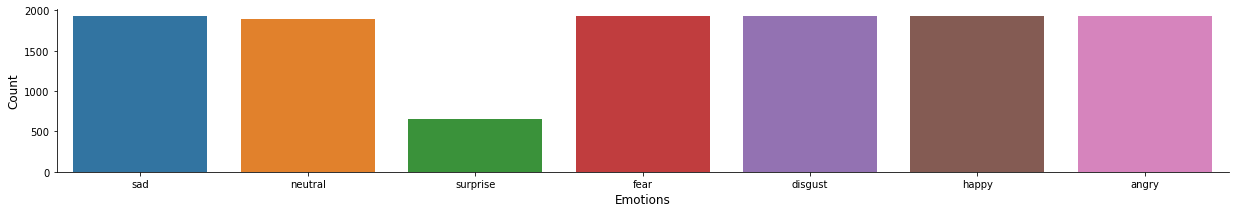

In [12]:
#let's plot the count of each emotions in the english dataset.
plt.figure(figsize =(21, 3))
sns.countplot(x=df_Eng["labels"])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# <center> Arabic Natural Audio Dataset </center>

the dataset has 3 discrete emotions: Happy,angry, and surprised. 

Eight videos of live calls between an anchor and a human outside the studio were downloaded from online Arabic talk shows. Each video was then divided into turns: callers and receivers. To label each video, 18 listeners were asked to listen to each video and select whether they perceive a happy, angry or surprised emotion. Silence, laughs and noisy chunks were removed. Every chunk was then automatically divided into 1 sec speech units forming our final corpus composed of 1384 records.


#### Academic citation 
klaylat, Samira; Osman, ziad; Zantout, Rached; Hamandi, Lama (2018), “Arabic Natural Audio Dataset”, Mendeley Data, V1, doi: 10.17632/xm232yxf7t.1
#### Acquired from
https://data.mendeley.com/datasets/xm232yxf7t/1

In [13]:
dir_list = os.listdir(ANAD)
dir_list.sort()

class_emotions = {'V1': 'happy', 'V2': 'surprise', 'V3': 'happy', 'V4': 'angry',
        'V5': 'angry', 'V6': 'surprise', 'V7': 'angry','V8': 'happy'}


emotion = []
path = []

for audio_file in dir_list:
    if audio_file.startswith('.'):
        continue
    for key in class_emotions:
        if key in audio_file:
            emotions = class_emotions[key]
            emotion.append(emotions)
    path.append(ANAD + audio_file)

    
    

ANAD_df = pd.DataFrame(emotion, columns = ['labels'])
ANAD_df['source'] = 'ANAD'
ANAD_df = pd.concat([ANAD_df,pd.DataFrame(path, columns = ['path'])],axis=1)
ANAD_df.labels.value_counts() 

happy       82
angry       52
surprise     8
Name: labels, dtype: int64

In [14]:
ANAD_df.head()

,labels,source,path
0,happy,ANAD,Datasets/Arabic Natural Audio Dataset/Speech/V...
1,happy,ANAD,Datasets/Arabic Natural Audio Dataset/Speech/V...
2,happy,ANAD,Datasets/Arabic Natural Audio Dataset/Speech/V...
3,happy,ANAD,Datasets/Arabic Natural Audio Dataset/Speech/V...
4,happy,ANAD,Datasets/Arabic Natural Audio Dataset/Speech/V...


# <center> KSUEmotions </center>

the dataset has 5 emotions: neutral, sadness, happiness, surprise, and questioning.
the collection of data was devided into two pahses. Phase 1 had 10 female speakers and 10 male speakers which has 1596 records, while phase 2 has 7 female speakers and 7 male speakers that has 1680 records which makes the totoal of the data set 3276 records.

#### File format
The audio files are named using the DxxExxPgxxSxxTxx

<img src="KSUE_file.png"> 

#### Academic citation 
A. H. Meftah, M. A. Qamhan, Y. Seddiq, Y. A. Alotaibi and S. A. Selouani, "King Saud University Emotions Corpus: Construction, Analysis, Evaluation, and Comparison," in IEEE Access, vol. 9, pp. 54201-54219, 2021, doi: 10.1109/ACCESS.2021.3070751. 

#### Acquired from 
https://catalog.ldc.upenn.edu/LDC2017S12

In [15]:
dir_list = os.listdir(KSUEmotions)
dir_list.sort()

class_emotions = {'E00': 'neutral', 'E01': 'happy', 'E02': 'sad', 'E03': 'surprise',
                  'E04': 'questioning', 'E05': 'angry'}

emotion = []
path = []



for phase in dir_list:
    if os.path.isdir(os.path.join(KSUEmotions, phase)):
        for emotion_path in os.listdir(os.path.join(KSUEmotions, phase)): 
            if "." in emotion_path:
                continue
            for audio_file in os.listdir(os.path.join(KSUEmotions, phase, emotion_path)):
                path.append(os.path.join(KSUEmotions, phase, emotion_path, audio_file))
                emotions = str(0)
                for key in class_emotions:
                    if key in audio_file:
                        emotions = class_emotions[key]
                        emotion.append(emotions)
                        

KSUEmotions_df = pd.DataFrame(emotion, columns = ['labels'])
KSUEmotions_df['source'] = 'KSUEmotions'
KSUEmotions_df = pd.concat([KSUEmotions_df,pd.DataFrame(path, columns = ['path'])],axis=1)
KSUEmotions_df.labels.value_counts()                  

surprise       656
neutral        656
happy          656
sad            653
angry          336
questioning    319
Name: labels, dtype: int64

In [16]:
KSUEmotions_df.head()

,labels,source,path
0,surprise,KSUEmotions,Datasets/ksu_emotions/data/SPEECH/Phase_1/E03/...
1,surprise,KSUEmotions,Datasets/ksu_emotions/data/SPEECH/Phase_1/E03/...
2,surprise,KSUEmotions,Datasets/ksu_emotions/data/SPEECH/Phase_1/E03/...
3,surprise,KSUEmotions,Datasets/ksu_emotions/data/SPEECH/Phase_1/E03/...
4,surprise,KSUEmotions,Datasets/ksu_emotions/data/SPEECH/Phase_1/E03/...


# <center>Combine all the Arabic dataset's dataframe into one<center>

In [17]:
df_Arab = pd.concat([ANAD_df, KSUEmotions_df], axis = 0)
df_Arab.labels.value_counts()

happy          738
surprise       664
neutral        656
sad            653
angry          388
questioning    319
Name: labels, dtype: int64

In [18]:
df_Arab.to_csv("Arabic_Data_path.csv",index=False)

In [19]:
# Display number of rows, columns, etc.
df_Arab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3418 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  3418 non-null   object
 1   source  3418 non-null   object
 2   path    3418 non-null   object
dtypes: object(3)
memory usage: 106.8+ KB


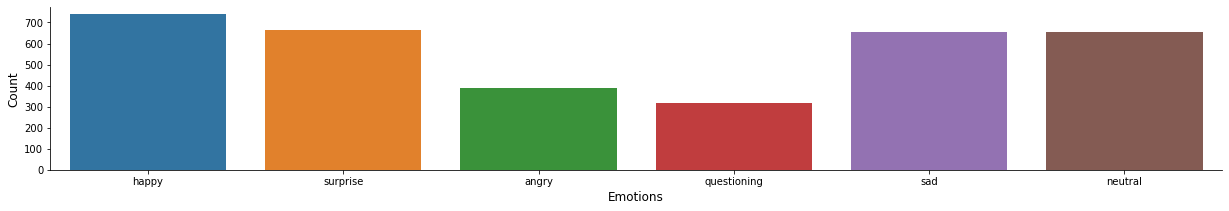

In [20]:
#let's plot the count of each emotions in the english dataset.
plt.figure(figsize =(21, 3))
sns.countplot(x=df_Arab["labels"])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# <center> All Datasets </center>

In [21]:
data_path = pd.concat([df_Eng, df_Arab], axis = 0)
data_path.labels.value_counts()

happy          2661
sad            2576
neutral        2551
angry          2311
fear           1923
disgust        1923
surprise       1316
questioning     319
Name: labels, dtype: int64

In [22]:
data_path = data_path[data_path["labels"]!="questioning"]
data_path = data_path[data_path["labels"]!="disgust"]
data_path = data_path[data_path["labels"]!="fear"]

In [23]:
data_path.to_csv("Data_path.csv",index=False)
data_path.labels.value_counts()

happy       2661
sad         2576
neutral     2551
angry       2311
surprise    1316
Name: labels, dtype: int64

In [24]:
# Display number of rows, columns, etc.
data_path.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11415 entries, 0 to 3275
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  11415 non-null  object
 1   source  11415 non-null  object
 2   path    11415 non-null  object
dtypes: object(3)
memory usage: 356.7+ KB


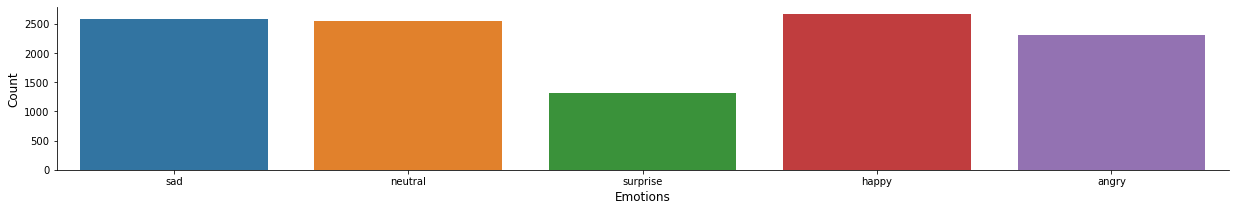

In [25]:
#let's plot the count of each emotions in the english dataset.
plt.figure(figsize =(21, 3))
sns.countplot(x=data_path["labels"])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# <center> Features's extraction </center>

## Data Augmentation

In [26]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [27]:
def extract_features(data, sample_rate, frame_length=2048, hop_length=512):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel)) # stacking horizontally
    
    return result


In [28]:
def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, offset=0.4)
    data = data.T
    
     # without augmentation
    res1 = extract_features(data,sample_rate)
    result = np.array(res1)
    
    # data with noise
    data_noise = noise(data)
    res2 = extract_features(data_noise,sample_rate)
    result = np.vstack((result, res2)) # stacking vertically
        
    return result

In [30]:
X, Y = [], []
i = 0
for path, emotion in zip(data_path.path, data_path.labels):
    feature = get_features(path)
    
    for ele in feature:
        X.append(ele)
        # appending emotion one time as we have made 1 augmentation techniques on each audio file.
        Y.append(emotion)
        i+=1
        if i%500==0:
            print(i)

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500


In [31]:
len(X), len(Y), data_path.path.shape

(22830, 22830, (11415,))

In [32]:
Features_Augmentation = pd.DataFrame(X)
Features_Augmentation['labels'] = Y
Features_Augmentation.to_csv('features_augmentation.csv', index=False)
Features_Augmentation.head(20)

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.019391,0.596803,0.544192,0.492998,0.503403,0.570076,0.630197,0.585214,0.543174,0.568560,...,1.050778e-05,2.997403e-06,7.111289e-07,4.916752e-07,4.868759e-07,4.599259e-07,3.758941e-07,2.814717e-07,2.338273e-07,sad
1,0.024156,0.668991,0.646738,0.608743,0.619338,0.660034,0.673722,0.624548,0.591040,0.616446,...,2.866707e-03,2.924835e-03,2.777213e-03,2.809680e-03,2.862503e-03,2.843573e-03,2.783918e-03,2.765235e-03,2.826194e-03,sad
2,0.013634,0.621171,0.548649,0.495449,0.521441,0.555481,0.576986,0.576854,0.583974,0.620989,...,1.021239e-06,3.780315e-07,2.230971e-07,2.112139e-07,2.119731e-07,2.118027e-07,1.974219e-07,1.748438e-07,1.587371e-07,sad
3,0.029471,0.746667,0.712394,0.685965,0.712725,0.729634,0.685229,0.628920,0.637637,0.677569,...,9.322491e-03,9.879013e-03,9.975285e-03,9.913878e-03,9.750677e-03,9.931363e-03,1.002722e-02,9.768168e-03,9.604855e-03,sad
4,0.014141,0.619437,0.621000,0.592190,0.514821,0.508869,0.522655,0.462100,0.449496,0.423172,...,7.066091e-07,4.583737e-07,3.990423e-07,3.878209e-07,3.711104e-07,3.249636e-07,2.347695e-07,1.518778e-07,1.158051e-07,neutral
5,0.021385,0.692037,0.738313,0.712784,0.662127,0.676345,0.629185,0.536359,0.526078,0.543309,...,4.296222e-03,4.001399e-03,4.060103e-03,4.238190e-03,4.278746e-03,4.005999e-03,4.068985e-03,4.126590e-03,4.347859e-03,neutral
6,0.018890,0.552444,0.495755,0.429380,0.439089,0.464212,0.482547,0.509818,0.541979,0.596347,...,5.006518e-06,1.366400e-06,4.894240e-07,4.122934e-07,4.078885e-07,3.792769e-07,2.874300e-07,1.990649e-07,1.599204e-07,surprise
7,0.030005,0.642872,0.588763,0.567606,0.585191,0.592728,0.552924,0.565358,0.614175,0.683998,...,8.894290e-03,9.198477e-03,8.969498e-03,9.037284e-03,8.991107e-03,9.140561e-03,9.392547e-03,9.042820e-03,8.775056e-03,surprise
8,0.016379,0.584681,0.537111,0.526547,0.558224,0.584993,0.491344,0.478172,0.473513,0.542705,...,5.425731e-07,4.925834e-07,4.777244e-07,4.809289e-07,4.986692e-07,5.305406e-07,5.345537e-07,5.012371e-07,4.653993e-07,neutral
9,0.029794,0.697850,0.689083,0.692258,0.717110,0.710994,0.575567,0.560809,0.563235,0.631592,...,7.548350e-03,7.806877e-03,7.407048e-03,7.683769e-03,8.308686e-03,7.811601e-03,7.494946e-03,7.810919e-03,7.454882e-03,neutral
